## LetsGrowMore 

# TASK 2 : Prediction using Decision Tree  Algorithm :

### By : Varsha Jadhav

## Importing the libraries

Let's first load the required libraries.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import os

## loading dataset

Let's first load the Iris dataset using panda's read CSV function.
 

In [20]:
iris = pd.read_csv(r"D:\varsha\LetsGrowMore\Task 2\Iris (1).csv",index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Description

In [21]:
iris.shape

(150, 5)

In [4]:
iris.isnull().mean()

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

There are no missng values in this dataset. We can also see this by a headmap as follows:

<IPython.core.display.Javascript object>

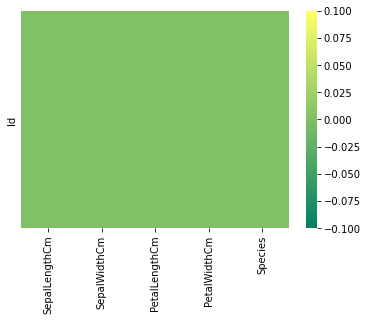

In [5]:
sns.heatmap(iris.isnull(),yticklabels=False,cmap="summer")

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


We can see that, only 'species' column is object type and all other columns are float type

In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this we can conclude that mean length of 'sepal_width' and 'petal_length' is some what similar and 'sepal_length' has maximum length. Also,'petal_length' has maximum deviation.

## Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris['Species']  = encoder.fit_transform(iris['Species'])

In [23]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


## Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [24]:
X = iris.drop('Species', axis = 1)
y = iris['Species']

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Decision Tree

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

## Visualizing Decision Trees



In [32]:
feature_cols = X.columns
target_cols = list(encoder.classes_)

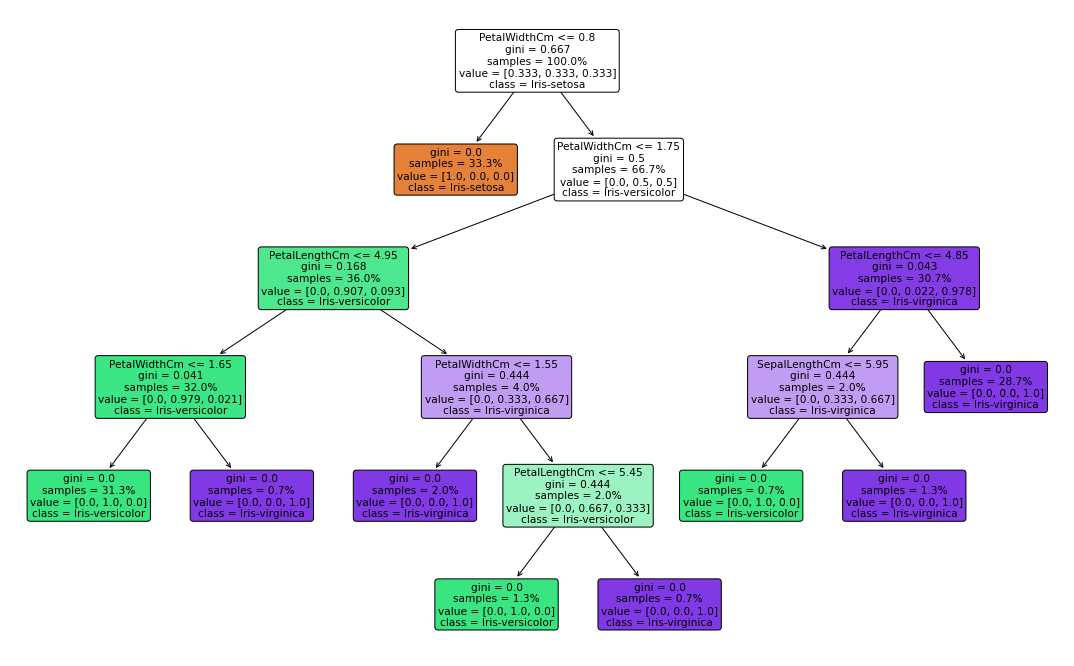

In [33]:
from sklearn import tree

plt.figure(figsize = (19,12))
tree.plot_tree(clf.fit(X, y), feature_names = feature_cols, class_names = target_cols, filled = True,
              precision = 3, proportion = True, rounded = True)
plt.show()

## Visualizing confusion matrix

In [28]:
from sklearn.metrics import plot_confusion_matrix

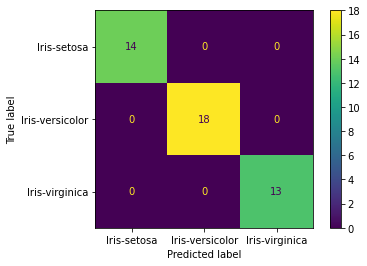

In [29]:
plot_confusion_matrix(clf,X_test,y_test,display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [ ]:
# From the confusion matrix plot we can conclude that all the species have classified correctly,
# accept 2 species from versicolor which are predicted as virginica and 
# 2 species from virginica which are predicted as versicolor.

## Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [34]:
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
# here we got the Accuracy=1 i.e. classification rate  is 1 ,which is very good!

## Pros
Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.
## Cons
Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree.
This can be reduced by bagging and boosting algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

# Thank You!